# Data Science Job Salaries

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains. This dataset contains the salary detais for data scientist along with other parameters.


## Downloading the Dataset

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./data-science-job-salaries" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
data_dir = './data-science-job-salaries'

import os
os.listdir(data_dir)

['ds_salaries.csv']

## Data Preparation and Cleaning

Let us look into the data and see which all columns are usefull. If required we can add more columns accordingly.



In [6]:
import pandas as pd
salary_df = pd.read_csv(data_dir+"/ds_salaries.csv")
salary_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## Exploratory Analysis and Visualization

We can explore the dataset by plotting some columns.



Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**1. Plotting a histogram of work years.**

<AxesSubplot:xlabel='work_year', ylabel='count'>

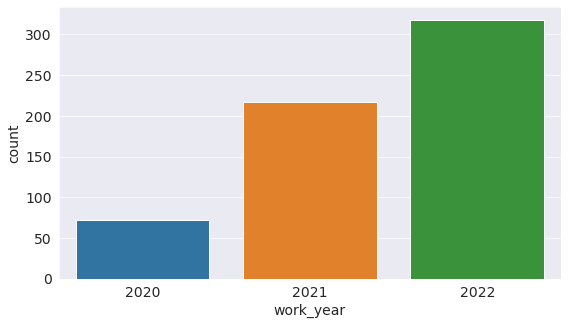

In [46]:
sns.countplot(x=salary_df['work_year'])

This plot shows that most of the employees joined during 2022.

**2. Plotting a histogram of experience levels**

<AxesSubplot:xlabel='experience_level', ylabel='count'>

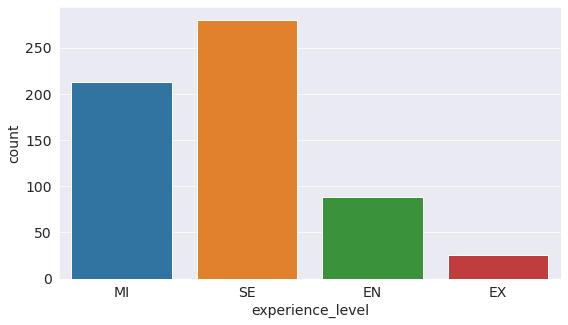

In [44]:
sns.countplot(x=salary_df['experience_level'])

This plot shows us that most of the employees are of SE and MI level.

**3. Plotting the salaries of employees**

<AxesSubplot:xlabel='salary_in_usd'>

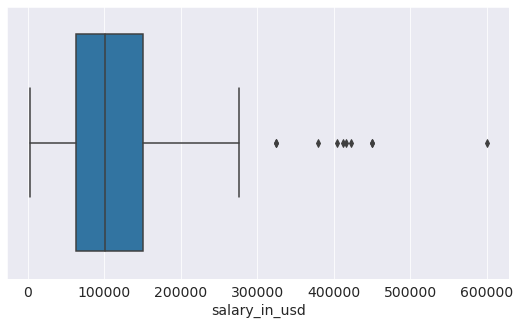

In [43]:
sns.boxplot(x=salary_df['salary_in_usd'])

This plot shows us that most of the employees have a salary under 200k and there are some with very high salaries.

**4. Plotting a histogram of Company size**

<AxesSubplot:xlabel='company_size', ylabel='count'>

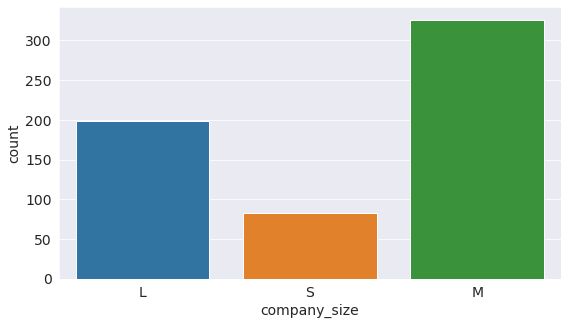

In [47]:
sns.countplot(x=salary_df['company_size'])

We see that mostly the company size is Large and then Medium. Small size is relatively less.

## Asking and Answering Questions



#### Q1: Which are the top paying Job titles?
This will help us know the highest paying job title in Data Science.

In [108]:
sorted_salary = salary_df[['job_title','salary_in_usd']].sort_values('salary_in_usd',ascending=False)
sorted_salary.head(5)

,job_title,salary_in_usd
252,Principal Data Engineer,600000
97,Financial Data Analyst,450000
33,Research Scientist,450000
157,Applied Machine Learning Scientist,423000
225,Principal Data Scientist,416000


We see the above 5 are the highest paid job titles in the Data Science.

#### Q2: Which are the top Average paying job titles?
The highest paying job title might not be an accurate representaion of the job distribution. The highest average paying job titles will be a better estimate to understand the salary better.

In [139]:
# Finding the highest paid jobs
average_salary = salary_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
average_salary.head(5)

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64

We now see that there are some other posts that gets a good average salary.

In [140]:
# Finding the lowest paid jobs
average_salary.tail(5)

job_title
Big Data Engineer                51974.000000
Computer Vision Engineer         44419.333333
NLP Engineer                     37236.000000
Product Data Analyst             13036.000000
3D Computer Vision Researcher     5409.000000
Name: salary_in_usd, dtype: float64

Now these are some of the lowest paid job titles.

#### Q3: Which post has the most hiring?
This helps us get an idea of how much of employees are hired in each post.

In [138]:
# Finding the most hired jobs
hiring = salary_df.groupby('job_title')['salary_in_usd'].count().sort_values(ascending=False)
hiring.head(5)

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: salary_in_usd, dtype: int64

These are the post with most hired employees. We see that they neither have the highest pay nor the lowest pay.

In [146]:
# Finding the avg salary of the most hired jobs
print(f"Data Scientist : {average_salary['Data Scientist']}")
print(f"Data Engineer  : {average_salary['Data Engineer']}")
print(f"Data Analyst   : {average_salary['Data Analyst']}")

Data Scientist : 108187.83216783217
Data Engineer  : 112725.0
Data Analyst   : 92893.06185567011


We see that the average salary of the most hired post is roughly $93k to $110k.

#### Q4: Which location has the highest salary?
We see that the salary varies with the location. Thus it is useful to know the salary distribution based on location.

In [154]:
# Finding the location with highest salary
location_sum = salary_df.groupby('company_location')['salary_in_usd'].sum().sort_values(ascending=False)
location_sum.head(5)

company_location
US    51139618
GB     3834403
CA     2994712
DE     2292842
FR      959560
Name: salary_in_usd, dtype: int64

These are the locations with the highest salaries paid to the employees. But here also we are considering the sum of the salaries, which may not be a good indication of the group data. Thus using the mean or average salary might be a better estimate.

In [156]:
# Finding the highest average salary
location = salary_df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
location.head(5)

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
Name: salary_in_usd, dtype: float64

We now see that some other countries also give a good average salary.

In [157]:
# Finding the lowest averge salary
location.tail(5)

company_location
UA    13400.000000
PK    13333.333333
KE     9272.000000
IR     4000.000000
VN     4000.000000
Name: salary_in_usd, dtype: float64

These are some of the locations with the lowest average salary.

#### Q5: Which currency has the highest pay?

In [193]:
currency_sum = salary_df.groupby('salary_currency')['salary_in_usd'].sum().sort_values(ascending=False)
currency_sum.head(5)

salary_currency
USD    54631386
EUR     6246390
GBP     3593523
CAD     1750012
INR      749670
Name: salary_in_usd, dtype: int64

We see that the max salary is obtained in the above currencies. But as mentioned earlier, the max of mean values is more relevent.

In [195]:
currency = salary_df.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False)
currency.head(5)

salary_currency
USD    137264.788945
CHF    122346.000000
SGD    104176.500000
CAD     97222.888889
AUD     87064.000000
Name: salary_in_usd, dtype: float64

## Inferences and Conclusion

Upon looking into the data we realized the follwing :
- Principal Data Engineer, Financial Data Analyst, Research Scientist, Applied Machine Learning Scientist and Principal Data Scientist are some of the top paid jobs in Data Science field.
- Data Analytics Lead, Principal Data Engineer, Financial Data Analyst, Principal Data Scientist and Director of Data Science are some of the top jobs with good average pay.
- Jobs such as Data Scientist, Data engineer and Data Analyst have a large hiring with an average salary of $93k to $110k.
- Locations such as RU, US, NZ, IL and JP has a good averge salary, but US has the largest total salary due to the large hiring.
- US also has the highest pay among others


## References
https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-4-analyzing-tabular-data-with-pandas
https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn